# Preferential Attachment & Machine Learning


## Expiramental settings
Fix $N >> 1$, the total number of balls we wish to distribute.
- Choose $1≤ m ≤10$, the number of balls thrown at each iteration.
- Choose $1 ≤ k_0 ≤ 10$, the initial number of balls that each newly created urn has.
- Run as many iterations as necessary to distribute all the balls, proportional to the number of balls in each urn (preferential attachment).
- Compute a summary of the distribution in a vector $P$, so that $P[i]$ is the number of urns that have precisely $i$ balls.

Now, feed the vectors to a deep neural network, whose purpose is to learn $k_0$ and $m$ from vector $P$.


In [1]:
import numpy as np

In [2]:
def yule_process(N, m, k0):
    """Distributes 𝑁 >> 1 balls among urns iteratively using preferential attachment policy.
        At each step, add a urn with initial 𝑘0 balls and distribute m balls among urns 
        with probablility proportional to the number of balls in each urn.
        Run as many iterations as necessary to distribute all 𝑁 balls.

    Parameters:
        𝑁  (int): 𝑁 >> 1, the total number of balls we wish to distribute.
        m  (int): 1≤ 𝑚 ≤10, the number of balls distributed at each iteration.
        𝑘0 (int): 1≤ 𝑘0 ≤10, the initial number of balls for a newly created urn.

    Returns:
        P vector(int): Vector 𝑃, such that 𝑃[𝑖] is the number of urns that have precisely 𝑖 balls.

   """

    # start with zero urns
    urns = np.array([], dtype=int)
    total_balls_distributed = 0

    # run as many iterations as necessary to distribute all 𝑁 balls
    n = N
    while n > 0:
        # verify we have enough left to work with
        if n < k0:
            break # discard leftovers
            
        # add a new urn with initial k0 balls
        urns = np.append(urns, k0)
        total_balls_distributed += k0
        
        n -= k0 # subtract k0 from total
        # verify we have enough left to work with
        if n < m:
            break # discard leftovers

        # select m urns proportioanl to the number of balls at each urn
        probs = urns / total_balls_distributed

        # we want np.random.choice() of indices, not values, 
        # so np.random.choice() from an index array of len(urns)
        indices = list(range(len(urns)))
        idx = np.random.choice(indices, size=m, p=probs, replace=True)

        # distribute m balls among the selected urns 
        # note: a single urn may get more than one ball because of np.random.choice(..., replace=True)
        for i in range(m):
            urns[idx[i]] += 1
        total_balls_distributed += m
        n -= m

    # initialize output array of size [0 .. max(urns)]
    P = np.zeros((1+max(urns),), dtype=int)
    for i in range(len(urns)):
        num_balls_in_urn = urns[i]
        P[num_balls_in_urn] += 1
    
    return P


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(14, 5), 'figure.dpi':100})

ax1 = ax2 = ax3 = None
def init_plot():
    global ax1, ax2, ax3
    plt.figure()
    ax1 = plt.subplot(1, 3, 1)
    plt.gca().set(title='balls distribution to urns', xlabel='balls', ylabel='urns (%)')
    ax2 = plt.subplot(1, 3, 2)
    plt.gca().set(title='log-log scale', xlabel='log(x)', ylabel='samples')
    ax3 = plt.subplot(1, 3, 3)
    plt.gca().set(title='log-log (cumsum)', xlabel='log(x)', ylabel='samples with value > x')

def plot(x):
    global ax1, ax2, ax3
    
    # linear scale
    ax1.bar(np.arange(len(x)), x/np.sum(x))
    
    # log-log scale
    ax2.loglog(x)

    # cumulative log-log scale (x[i] = sum of samples with value > x)
    ax3.loglog(np.cumsum(x[::-1])[::-1])


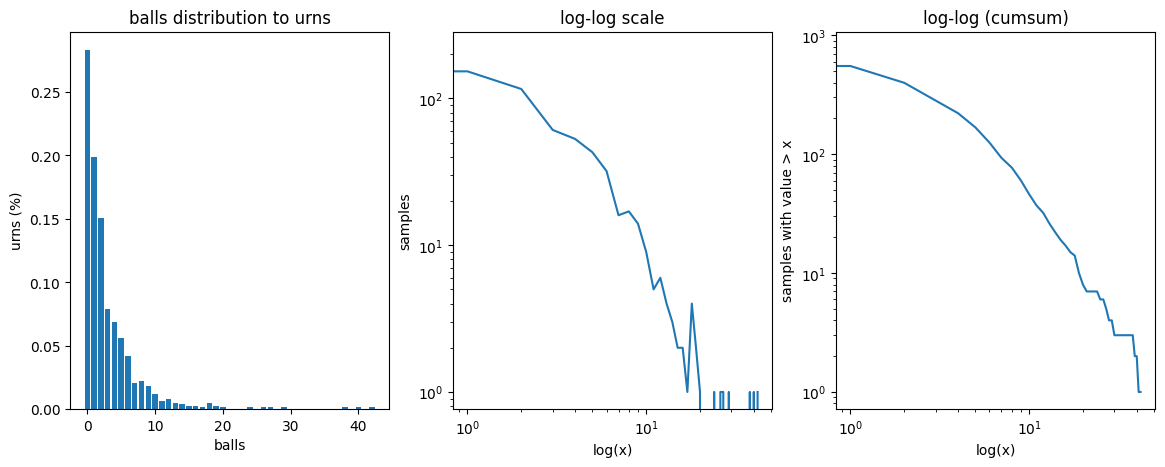

In [4]:
N = 10000; k0 = 10; m = 3
P = yule_process(N=N, m=m, k0=k0)
init_plot()
plot(P[k0:])


## Fix $K_0$ change $m$

len(P): 60 max(P): 241 argmax(P): 10
len(P): 51 max(P): 234 argmax(P): 10
len(P): 62 max(P): 220 argmax(P): 10

len(P): 110 max(P): 159 argmax(P): 10
len(P): 115 max(P): 157 argmax(P): 10
len(P): 178 max(P): 168 argmax(P): 10

len(P): 199 max(P): 129 argmax(P): 10
len(P): 219 max(P): 122 argmax(P): 10
len(P): 204 max(P): 109 argmax(P): 10


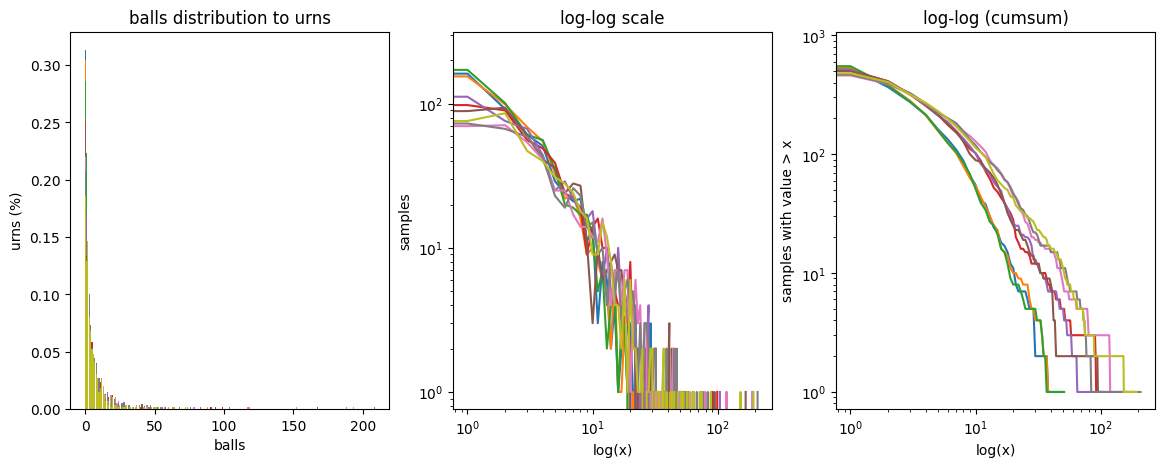

In [5]:
init_plot()

for i in range(3):
    P = yule_process(N=10000, m=3, k0=10)
    print('len(P): {} max(P): {} argmax(P): {}'.format(len(P), np.max(P), np.argmax(P)))
    plot(P[k0:])
print()

for i in range(3):
    P = yule_process(N=10000, m=5, k0=10)
    print('len(P): {} max(P): {} argmax(P): {}'.format(len(P), np.max(P), np.argmax(P)))
    plot(P[k0:])

print()
for i in range(3):
    P = yule_process(N=10000, m=7, k0=10)
    print('len(P): {} max(P): {} argmax(P): {}'.format(len(P), np.max(P), np.argmax(P)))
    plot(P[k0:])

## Plot from $P[0]$

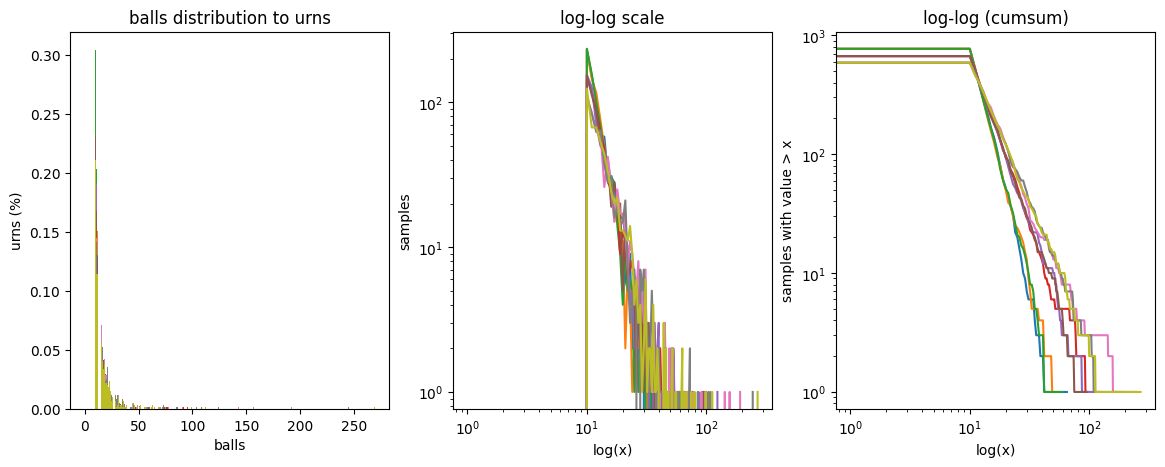

In [6]:
init_plot()

for i in range(3):
    P = yule_process(N=10000, m=3, k0=10)
    plot(P)

for i in range(3):
    P = yule_process(N=10000, m=5, k0=10)
    plot(P)

for i in range(3):
    P = yule_process(N=10000, m=7, k0=10)
    plot(P)

## Fix $m$ change $K_0$

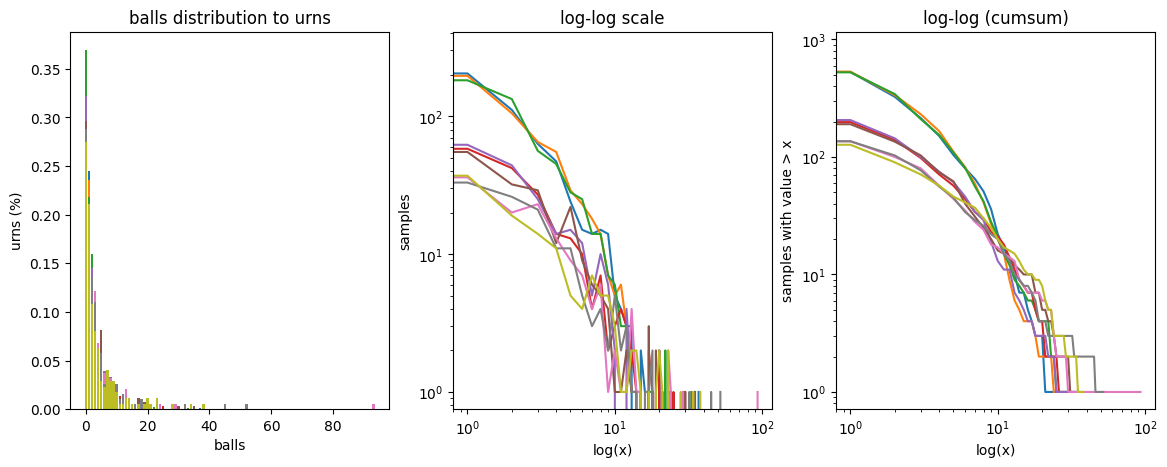

In [7]:
init_plot()

for i in range(3):
    P = yule_process(N=10000, m=2, k0=10)
    plot(P[k0:])

print()
for i in range(3):
    P = yule_process(N=10000, m=2, k0=7)
    plot(P[k0:])

print()
for i in range(3):
    P = yule_process(N=10000, m=2, k0=5)
    plot(P[k0:])

## Plot from $P[0]$

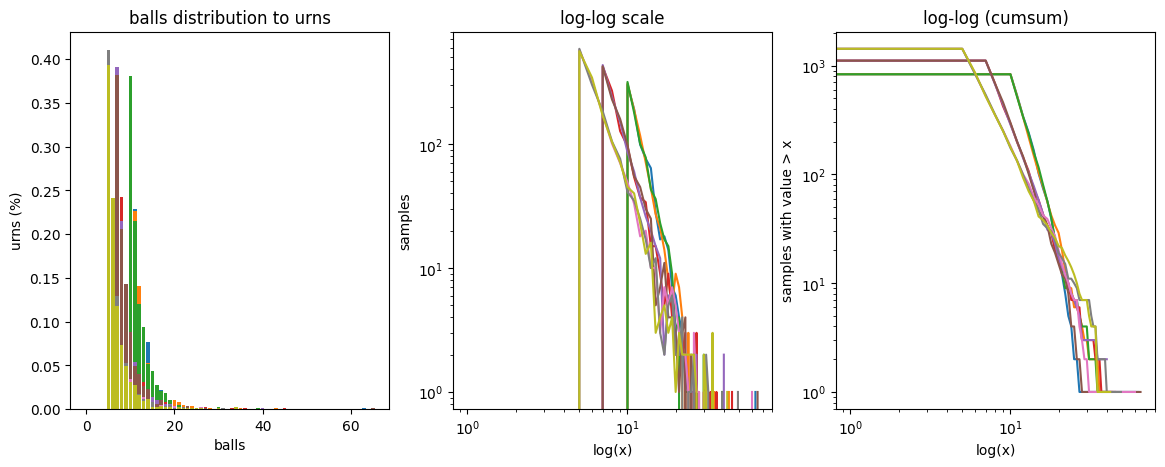

In [8]:
init_plot()

for i in range(3):
    P = yule_process(N=10000, m=2, k0=10)
    plot(P)

for i in range(3):
    P = yule_process(N=10000, m=2, k0=7)
    plot(P)

for i in range(3):
    P = yule_process(N=10000, m=2, k0=5)
    plot(P)